In [3]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
print(tf.__version__)

2.0.0


In [10]:
# MNIST data 
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

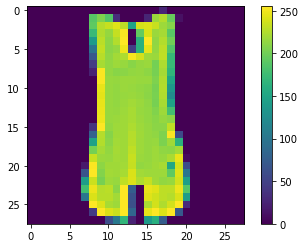

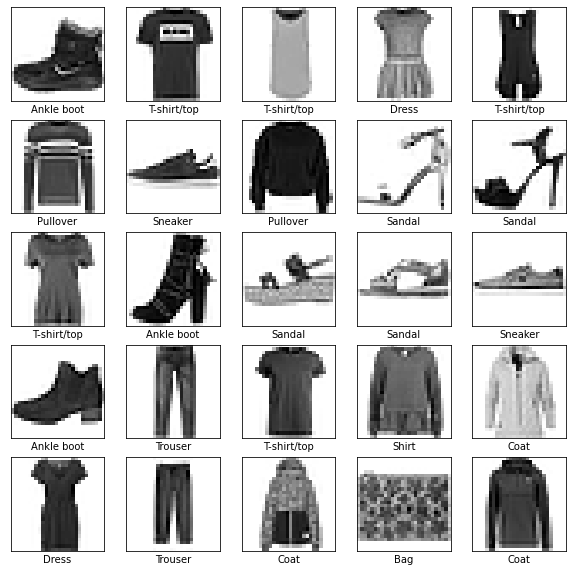

In [17]:
# preprocess
plt.figure() 
plt.imshow(train_images[4])
plt.colorbar()
plt.grid(False)
plt.show()

# Divide by 255
train_images = train_images / 255.0
test_images = test_images / 255.0

# Show 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
# Model 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# compile 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
# Training 
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.4977 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3766 - accuracy: 0.8632
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3375 - accuracy: 0.8756
Epoch 4/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3117 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2958 - accuracy: 0.8893
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2791 - accuracy: 0.8968
Epoch 7/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2651 - accuracy: 0.9010
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2548 - accuracy: 0.9059
Epoch 9/10
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2467 - accuracy: 0.9085
Epoch 10/10
60

In [21]:
# Evaluation 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
test_acc

10000/1 - 1s - loss: 0.2141 - accuracy: 0.8807


0.8807

In [23]:
# Prediction model
prob_model = tf.keras.Sequential([model, 
                                  tf.keras.layers.Softmax()])
pred = prob_model.predict(test_images)

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

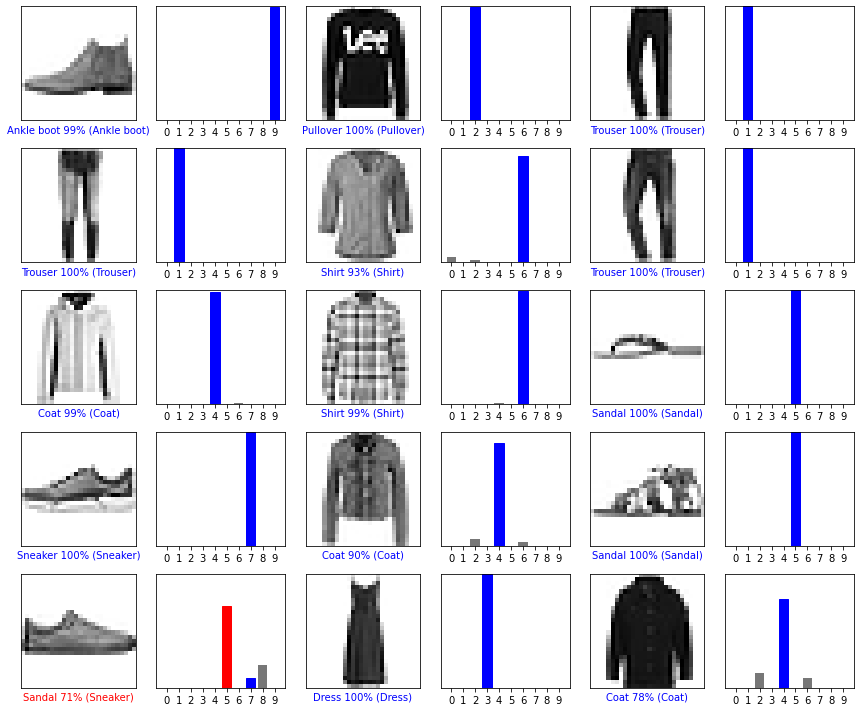

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], test_labels)
plt.tight_layout()
plt.show()